# TitaSink 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

In [2]:
cwd = os.getcwd()

In [3]:
path = os.path.join(cwd,'train.csv')
print(path)
data = pd.read_csv(path)

C:\Users\VArri\Documents\GitHub\TitaSink\train.csv


In [4]:
data.head()
# SibSp describes number of parent relatives at horizontal genealogic level 
# Parch describes number of parent relatives at vertical genealogic level 

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

PassengerId    Survived      Pclass         Age       SibSp       Parch  \
count  891.000000  891.000000  891.000000  714.000000  891.000000  891.000000   
mean   446.000000    0.383838    2.308642   29.699118    0.523008    0.381594   
std    257.353842    0.486592    0.836071   14.526497    1.102743    0.806057   
min      1.000000    0.000000    1.000000    0.420000    0.000000    0.000000   
25%    223.500000    0.000000    2.000000   20.125000    0.000000    0.000000   
50%    446.000000    0.000000    3.000000   28.000000    0.000000    0.000000   
75%    668.500000    1.000000    3.000000   38.000000    1.000000    0.000000   
max    891.000000    1.000000    3.000000   80.000000    8.000000    6.000000   

             Fare  
count  891.000000  
mean    32.204208  
std     49.693429  
min      0.000000  
25%      7.910400  
50%     14.454200  
75%     31.000000  
max    512.329200

In [6]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data['Sex'].replace(['female','male'],[0,1], inplace=True) 
#pd.get_dummies(data, columns=["Sex"], drop_first=True).head()
# pour une variable binaire, modification en place
# plus adapté que get_dummies qui retourne des one hot encoding avec l colonnes 

In [8]:
data.drop(columns=['Name', 'Cabin', 'Ticket'], inplace=True) 
# dropping Name column as it is considered not relevant and Cabin as there is too much NaN

In [9]:
data['Embarked'].fillna('C', inplace=True) 
# arbitrarily filling with Cherbourg values 

In [10]:
data.head()

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0            1         0       3    1  22.0      1      0   7.2500        S
1            2         1       1    0  38.0      1      0  71.2833        C
2            3         1       3    0  26.0      0      0   7.9250        S
3            4         1       1    0  35.0      1      0  53.1000        S
4            5         0       3    1  35.0      0      0   8.0500        S

In [11]:
data['Embarked'].fillna('C', inplace=True)

<AxesSubplot:>

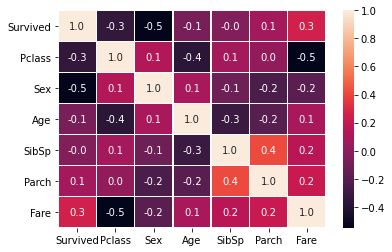

In [12]:
sns.heatmap(data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].corr(), annot=True,linewidth=.5,fmt='.1f')

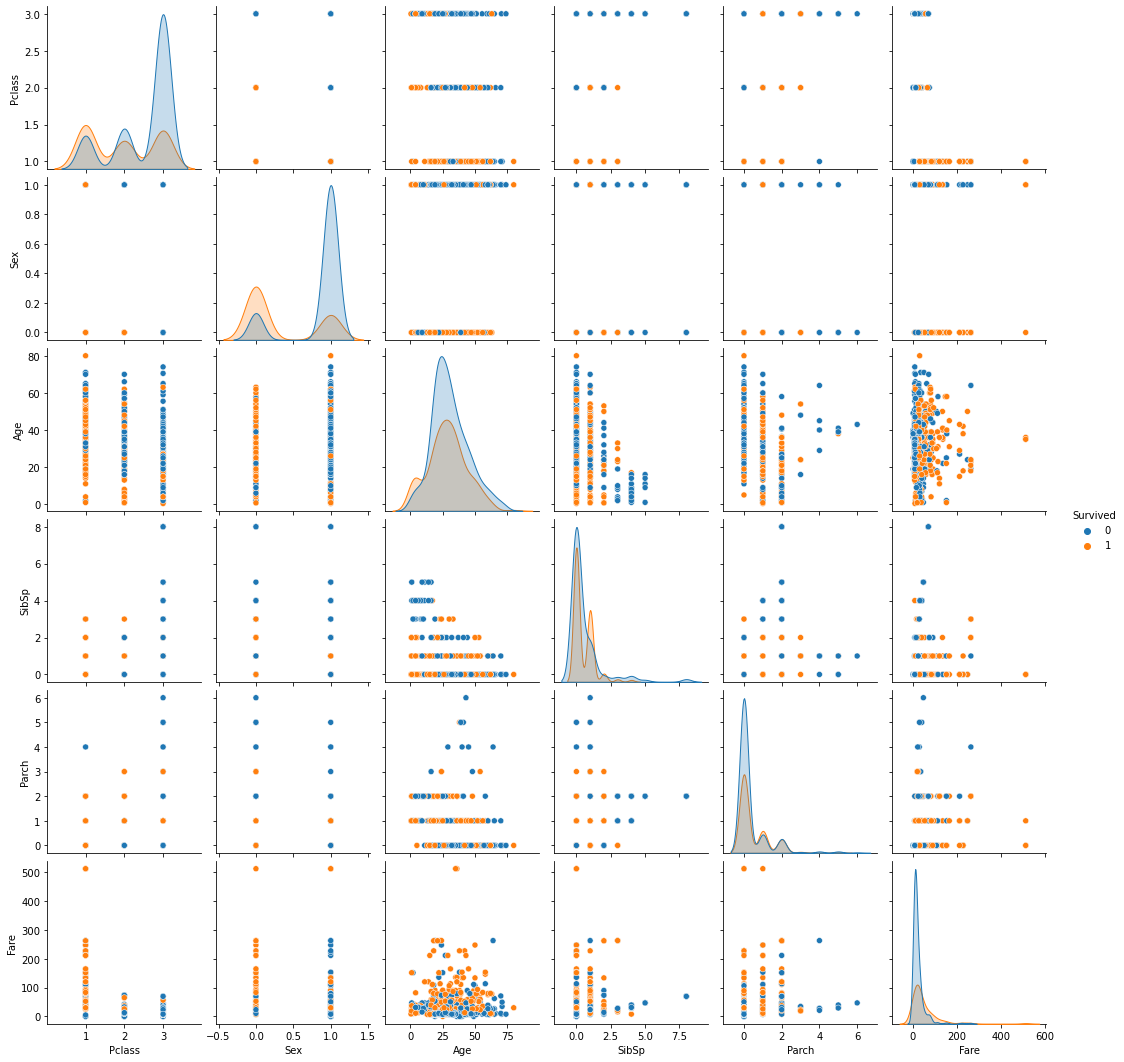

In [13]:
#Pair Plot
sns.pairplot(data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']], hue="Survived")
plt.show()

In [14]:
data_bin = pd.get_dummies(data, columns=['Pclass', 'Embarked'])
data_bin.head()

PassengerId  Survived  Sex   Age  SibSp  Parch     Fare  Pclass_1  \
0            1         0    1  22.0      1      0   7.2500         0   
1            2         1    0  38.0      1      0  71.2833         1   
2            3         1    0  26.0      0      0   7.9250         0   
3            4         1    0  35.0      1      0  53.1000         1   
4            5         0    1  35.0      0      0   8.0500         0   

   Pclass_2  Pclass_3  Embarked_C  Embarked_Q  Embarked_S  
0         0         1           0           0           1  
1         0         0           1           0           0  
2         0         1           0           0           1  
3         0         0           0           0           1  
4         0         1           0           0           1

In [15]:
# dans un premier temps on remplit les valeurs manquantes ages avec une distribution normale 
# mais est-ce que l'age ne peut pas être estimé d'après le fare étant donné le pair plot ? 
data_bin.fillna(np.random.normal(data_bin['Age'].mean(), data_bin['Age'].std()), inplace=True)
data_bin.head()

PassengerId  Survived  Sex   Age  SibSp  Parch     Fare  Pclass_1  \
0            1         0    1  22.0      1      0   7.2500         0   
1            2         1    0  38.0      1      0  71.2833         1   
2            3         1    0  26.0      0      0   7.9250         0   
3            4         1    0  35.0      1      0  53.1000         1   
4            5         0    1  35.0      0      0   8.0500         0   

   Pclass_2  Pclass_3  Embarked_C  Embarked_Q  Embarked_S  
0         0         1           0           0           1  
1         0         0           1           0           0  
2         0         1           0           0           1  
3         0         0           0           0           1  
4         0         1           0           0           1

In [16]:
data_bin.isna().sum()

PassengerId    0
Survived       0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [31]:
X_train = data_bin.drop(columns=['PassengerId', 'Survived'])
Y_train = data_bin['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [18]:
import sklearn as sk

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
# Normalise indépendamment les variables. 
data_norm = scaler.fit_transform(X_train)
data_norm[:5,:]

array([[-1.73010796, -0.78927234,  0.73769513, -0.45371683,  0.43279337,
        -0.47367361, -0.50244517, -0.56568542, -0.51015154,  0.90258736,
        -0.48557557, -0.30756234,  0.61930636],
       [-1.72622007,  1.2669898 , -1.35557354,  0.74063918,  0.43279337,
        -0.47367361,  0.78684529,  1.76776695, -0.51015154, -1.10792599,
         2.05941168, -0.30756234, -1.61470971],
       [-1.72233219,  1.2669898 , -1.35557354, -0.15512783, -0.4745452 ,
        -0.47367361, -0.48885426, -0.56568542, -0.51015154,  0.90258736,
        -0.48557557, -0.30756234,  0.61930636],
       [-1.71844431,  1.2669898 , -1.35557354,  0.51669743,  0.43279337,
        -0.47367361,  0.42073024,  1.76776695, -0.51015154, -1.10792599,
        -0.48557557, -0.30756234,  0.61930636],
       [-1.71455642, -0.78927234,  0.73769513,  0.51669743, -0.4745452 ,
        -0.47367361, -0.48633742, -0.56568542, -0.51015154,  0.90258736,
        -0.48557557, -0.30756234,  0.61930636]])

In [33]:
# Let us start by Decision Tree Classifier from SKLEARN PACKAGES
from sklearn.tree import DecisionTreeClassifier
TreeClf = DecisionTreeClassifier(max_depth=5)

TreeClf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5)

In [38]:
score = TreeClf.score(X_train, Y_train)
score

0.8417508417508418

[Text(168.47307692307692, 199.32, 'X[0] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(94.43076923076923, 163.07999999999998, 'X[7] <= 0.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]'),
 Text(38.63076923076923, 126.83999999999999, 'X[1] <= 2.5\ngini = 0.1\nsamples = 170\nvalue = [9, 161]'),
 Text(17.16923076923077, 90.6, 'X[6] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(8.584615384615384, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(60.09230769230769, 90.6, 'X[4] <= 28.856\ngini = 0.091\nsamples = 168\nvalue = [8, 160]'),
 Text(42.92307692307692, 54.359999999999985, 'X[4] <= 28.231\ngini = 0.182\nsamples = 69\nvalue = [7, 62]'),
 Text(34.33846153846154, 18.119999999999976, 'gini = 0.161\nsamples = 68\nvalue = [6, 62]'),
 Text(51.50769230769231, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(77.26153846153846, 54.359

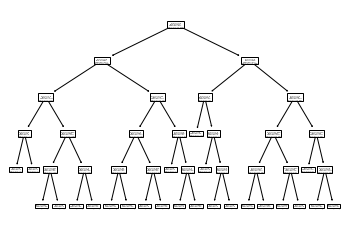

In [41]:
sk.tree.plot_tree(TreeClf)

In [42]:
path = os.path.join(cwd,'test.csv')
print(path)
Test_Data = pd.read_csv(path)

C:\Users\VArri\Documents\GitHub\TitaSink\test.csv


In [43]:
Test_Data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [ ]:
data['Sex'].replace(['female','male'],[0,1], inplace=True)
data.drop(columns=['Name', 'Cabin', 'Ticket'], inplace=True) 